In [1]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
# Download and unzip our images and Facial landmark model
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.zip
!unzip -qq images.zip
!unzip -qq shape_predictor_68_face_landmarks.zip

--2022-10-28 15:07:01--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.244.142
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.244.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.7MB/s    in 2.1s    

2022-10-28 15:07:04 (13.7 MB/s) - ‘images.zip’ saved [29586716/29586716]

--2022-10-28 15:07:04--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.244.142
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.244.142|:443... 

##Facial Landmark Detection


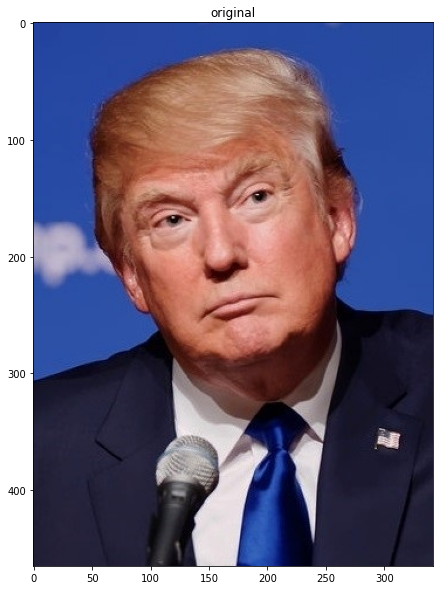

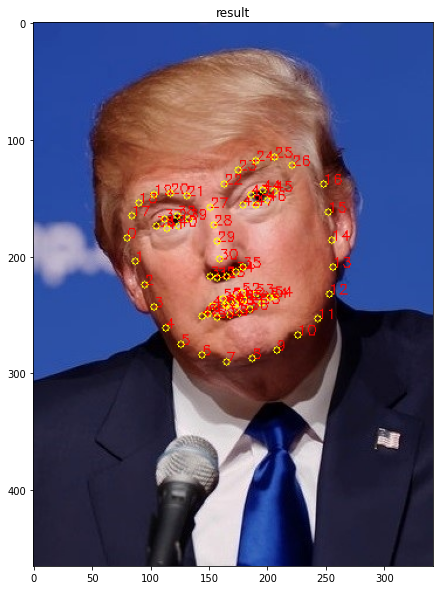

In [8]:
PREDICTOR_PATH = "/content/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()

class TooManyFaces(Exception):
  pass
class NoFaces(Exception):
  pass

def get_landmarks(im):
  rects = detector(im, 1)

  if len(rects) > 1:
    raise TooManyFaces
  if len(rects) == 0:
    raise NoFaces

  return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im, landmarks):
  im = im.copy()
  for idx, point in enumerate(landmarks):
    pos = (point[0,0], point[0,1])
    cv2.putText(im, str(idx), pos,
                fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                fontScale=0.4,

                color=(0, 0, 255))
    cv2.circle(im, pos, 3, color=(0, 255, 255))
  return im

image = cv2.imread('/content/images/Trump.jpg')
imshow('original', image)
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)
imshow('result', image_with_landmarks)

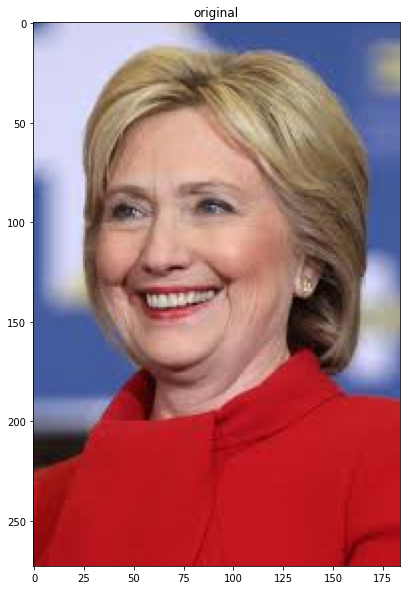

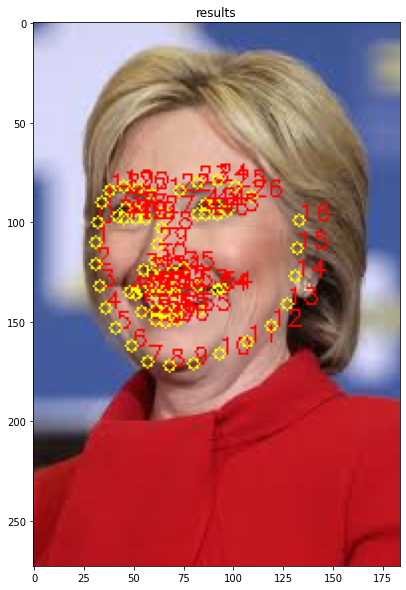

In [9]:
image = cv2.imread('images/Hillary.jpg')
imshow('original', image)
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image, landmarks)
imshow('results', image_with_landmarks)

